# Plot the Results of Simulated Data (Different Noise Levels and Combinations)

## Packages Loading

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.metrics.cluster import adjusted_rand_score

import sys
sys.path.append(r'../../../../')
from Model.utils import reorder_categories

## Results Loading

In [85]:
slice_id = 1        # 1, 2, 3, 4
noise_level = 3     # 0, 1, 2, 3

adata_results = sc.read_h5ad(f'../../../Noise_Combination_{slice_id}.h5ad')
adata_results = adata_results[adata_results.obs['noise_level'] == noise_level]

## Plot the Spatial Domain Identifications

In [104]:
## define the plot parameters
colors_domain = ['#f19c79', '#e9c46a', '#2a9d8f', '#264653']

font_size = 16

save_path = f'../../Noise_Combinations/Combination{slice_id}/'

result_key = ['SpaKnit', 'SpatialGlue', 'MultiVI', 'MultiMAP', 'STAGATE', 'SpaGCN', 'Modality1', 'Modality2']

new_order_dict_all = {
    0: {
        'SpaKnit':      [2, 1, 3, 4],
        'SpatialGlue':  [1, 2, 3, 4],
        'MultiVI':      [4, 2, 3, 1],
        'MultiMAP':     [1, 3, 2, 4],
        'STAGATE':      [2, 1, 3, 4],
        'SpaGCN':       [3, 1, 0, 2],
        'Modality1':    [1, 2, 3, 4],
        'Modality2':    [1, 4, 3, 2]
    },
    1: {
        'SpaKnit':      [1, 2, 3, 4],
        'SpatialGlue':  [3, 1, 4, 2],
        'MultiVI':      [2, 1, 3, 4],
        'MultiMAP':     [1, 2, 3, 4],
        'STAGATE':      [1, 2, 4, 3],
        'SpaGCN':       [0, 3, 1, 2],
        'Modality1':    [1, 2, 3, 4],
        'Modality2':    [2, 3, 1, 4]
    },
    2: {
        'SpaKnit':      [2, 3, 4, 1],
        'SpatialGlue':  [1, 2, 3, 4],
        'MultiVI':      [2, 1, 3, 4],
        'MultiMAP':     [1, 2, 3, 4],
        'STAGATE':      [1, 2, 4, 3],
        'SpaGCN':       [3, 0, 1, 2],
        'Modality1':    [1, 2, 3, 4],
        'Modality2':    [2, 3, 1, 4]
    },
    3: {
        'SpaKnit':      [2, 3, 4, 1],
        'SpatialGlue':  [1, 3, 2, 4],
        'MultiVI':      [2, 4, 3, 1],
        'MultiMAP':     [1, 3, 2, 4],
        'STAGATE':      [3, 1, 2, 4],
        'SpaGCN':       [0, 3, 2, 1],
        'Modality1':    [1, 2, 3, 4],
        'Modality2':    [1, 2, 3, 4]
    }
}

new_order_dict = new_order_dict_all[noise_level]

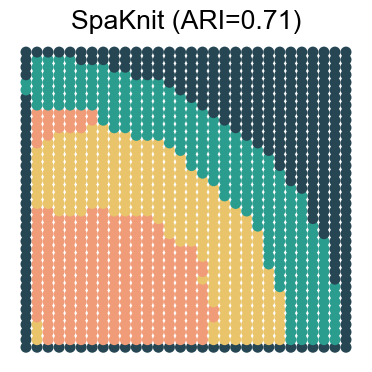

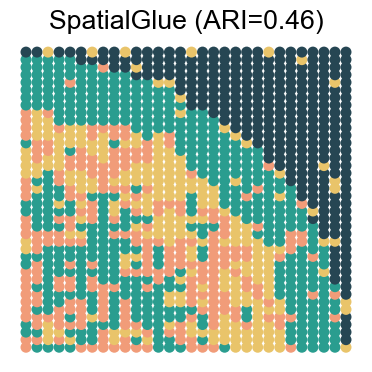

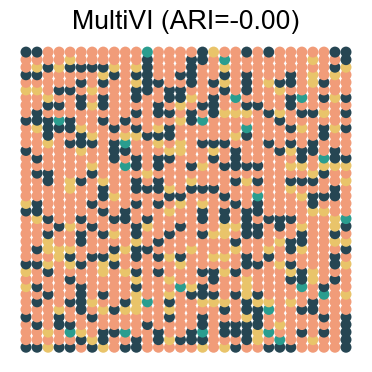

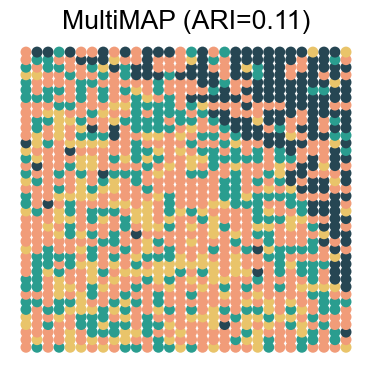

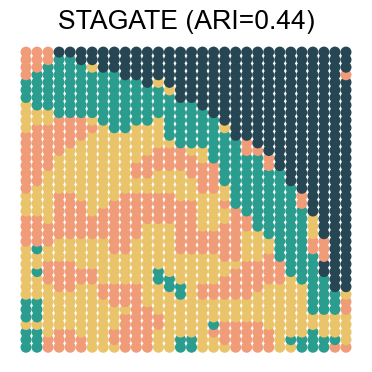

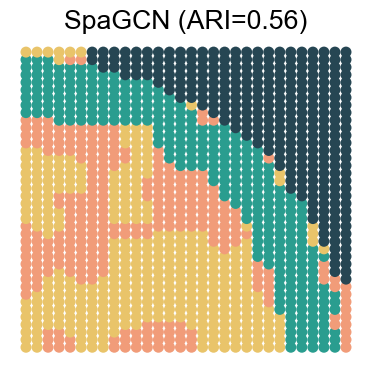

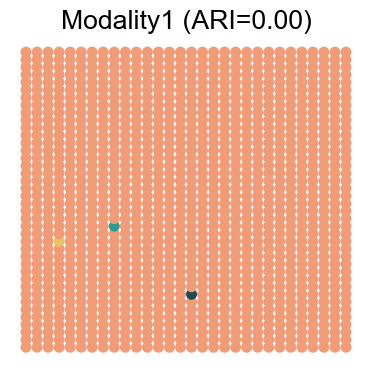

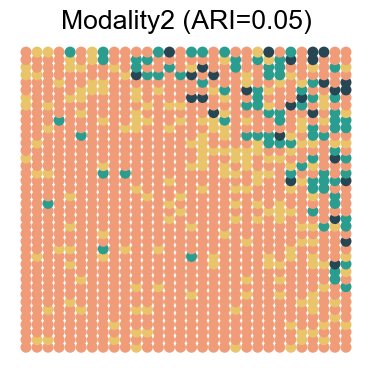

In [105]:
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = font_size

for result in result_key:
    new_order = new_order_dict[result]
    reorder_categories(adata_results, result, new_order)

    # Calculate ARI
    ari_value = adjusted_rand_score(adata_results.obs['Ground Truth'], adata_results.obs[result])

    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    sc.pl.embedding(
        adata_results,
        basis='spatial',
        color=result,
        title=None,
        s=250,
        colorbar_loc=None,
        show=False,
        ax=ax,
        palette=colors_domain,
        legend_loc=None
    )

    ax.set_title(f"{result} (ARI={ari_value:.2f})")
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Hide axis borders
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Adjust subplot parameters
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.tight_layout()

    plt.savefig(f'{noise_level}_{result}.png', dpi=500)
    plt.savefig(f'{noise_level}_{result}.eps')

    plt.show()